# Charging Pile Demand Forecasting


The Charging Pile Demand Forecasting Dataset is designed to enable predictive analysis of electric vehicle (EV) charging behavior. It captures key operational and contextual variables affecting EV charging demand, including charging duration, energy consumed, traffic flow, weather conditions, and geographical features. By incorporating factors such as vehicle type, charging station density, and government incentives, the dataset simulates real-world conditions to support robust forecasting models.
🔑 Key Features:
Charging Duration: Time spent using a charging pile (hours)

o Energy Consumed: Energy drawn during each session (kWh)

o Traffic Flow: Volume of vehicles in the station's vicinity

o Weather Data: Temperature, humidity, precipitation, wind speed

o Geographical Info: Latitude, longitude, and road proximity

o Charging Price & Incentives: Cost per kWh and any government benefits

This dataset is grounded in a field experiment conducted by public policy professor Omar Asensio and team, involving 3,395 charging sessions from 85 drivers at 105 stations across 25 workplace sites. The data was collected between November 2014 and October 2015, tracking session dates, durations, energy usage, and pricing, offering a real-world foundation for developing machine learning models to forecast EV charging demand.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # suppress all warnings

# Example loading data
df = pd.read_csv("station_data.csv")
jk = pd.read_csv("forecasting.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
df

,sessionId,kwhTotal,dollars,date,created,ended,startTime,endTime,chargeTimeHrs,weekday,...,distance,userId,stationId,locationId,managerVehicle,facilityType,reportedZip,year,month,charging_time
0,1366563,7.78,0.0,2014-18-11,15:40:26,17:11:04,15,17,1.510556,Tue,...,21.023830,35897499,582873,461655,0,3,0,2014,Nov,2
1,3075723,9.74,0.0,2014-19-11,15:40:27,17:11:05,17,19,2.177222,Wed,...,21.023830,35897499,549414,461655,0,3,0,2014,Nov,2
2,4228788,6.76,0.6,2014-20-11,15:40:28,17:11:06,12,16,4.671667,Fri,...,21.023830,35897499,129465,461655,0,3,0,2014,Nov,4
3,3173284,6.17,0.0,2014-21-11,15:40:29,17:11:07,19,21,1.768333,Wed,...,21.023830,35897499,569889,461655,0,3,0,2014,Nov,2
4,3266500,0.93,0.0,2014-22-11,15:40:30,17:11:08,20,21,0.298611,Thu,...,21.023830,35897499,414088,566549,0,3,0,2014,Nov,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,6.74,0.0,2024-29-02,15:40:3416,17:11:3394,16,19,3.463889,Thu,...,13.352643,59574735,884707,648339,0,2,1,2024,Feb,3
3391,3758092,6.86,0.0,03-01-2024,15:40:3417,17:11:3395,16,19,2.971389,Fri,...,13.352643,59574735,884707,648339,0,2,1,2024,Mar,3
3392,5858374,6.07,0.0,03-02-2024,15:40:3418,17:11:3396,16,20,3.495556,Wed,...,2.337085,32070852,638536,868085,0,3,1,2024,Mar,4
3393,2586645,5.74,0.0,03-03-2024,15:40:3419,17:11:3397,11,13,2.202778,Thu,...,4.671064,58023207,818217,700367,1,2,1,2024,Mar,2


## Distribution of Charging Duration ##

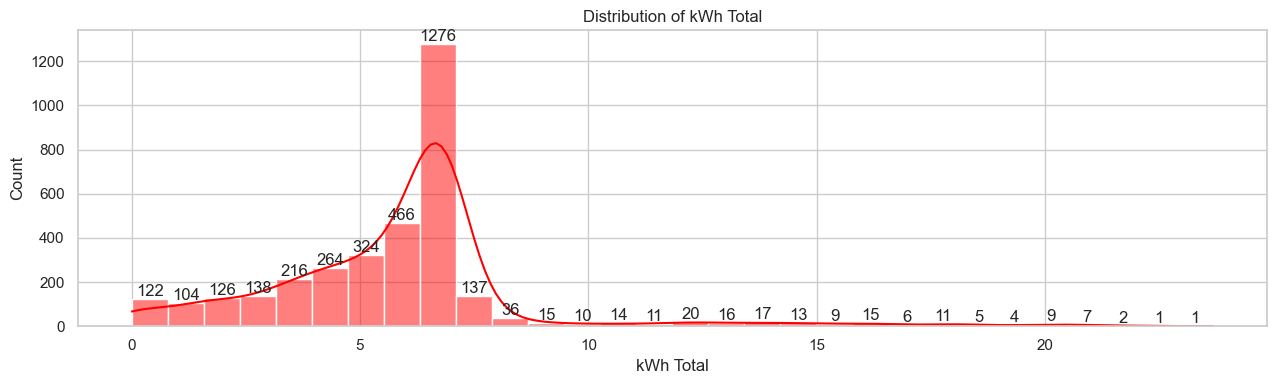

In [80]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 4))
plt.subplot(1, 2, 1)
ax = sns.histplot(df['kwhTotal'], bins=30, kde=True , color ='red'  )
sns.color_palette("icefire", as_cmap=True)
plt.title('Distribution of kWh Total')
plt.xlabel('kWh Total')
plt.ylabel('Count')
for container in ax.containers:
            ax.bar_label(container)
plt.tight_layout()
plt.show()

Interpretation:
The majority of charging sessions deliver between 4 and 5 kWh, as shown by the peak in the histogram. The distribution is right-skewed, indicating that while most users charge for a small amount, a few sessions involve much larger energy transfers. This suggests that typical EV users at these stations are likely topping up their batteries rather than performing full charges.

### Insight from Weekday Charging Behavior ###

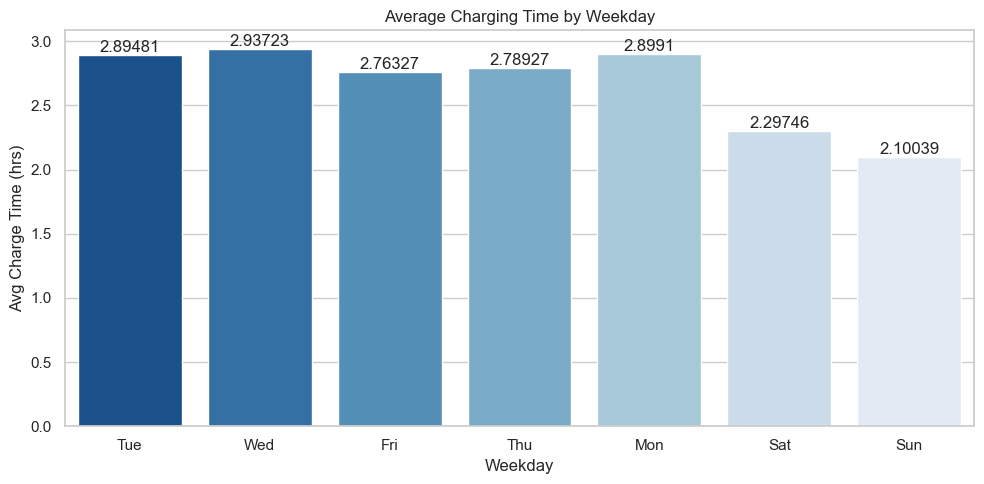

In [131]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='weekday', y='chargeTimeHrs',  ci=None,palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Charging Time by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Avg Charge Time (hrs)')

plt.tight_layout()
plt.show()


The bar chart illustrates the average charging time (in hours) for electric vehicles across different days of the week. 

The following key observations can be made:

o Weekdays (Monday to Friday) generally show higher average charging times compared to weekends.

o Tuesday and Thursday appear to have the longest charging durations, possibly indicating peak office commute days or midweek charging habits.

o Saturday and Sunday show a notable drop, suggesting reduced EV activity or shorter charging needs during weekends.

o This pattern reflects typical workplace charging behavior, consistent with the dataset's context of workplace-based charging stations.

### Explanation of the Plot: Distribution of kWh Total ###


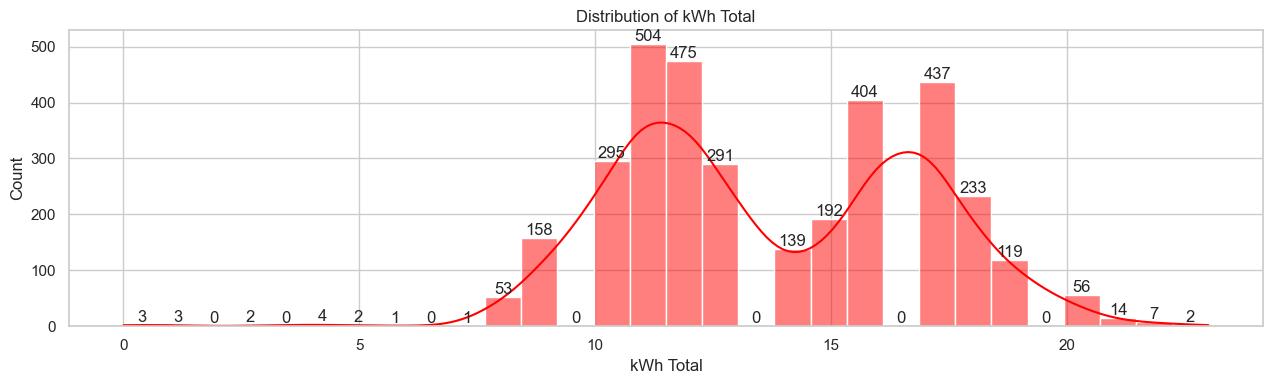

In [139]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 4))

plt.subplot(1, 2, 1)
ax = sns.histplot(df['startTime'], bins=30, kde=True,  color='Red')
plt.title('Distribution of kWh Total')
plt.xlabel('kWh Total')
plt.ylabel('Count')

for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show() 

### Interpretation for Decision-Making ###

o Planning Charging Infrastructure:

Since most sessions range from 10–17 kWh, charging stations can be optimized for mid-range sessions in terms of speed and capacity.

o User Segmentation:

The bimodal behavior suggests at least two different user groups — short-range commuters vs. long-distance users or users with larger EVs.

o Anomaly Detection:

Sessions on the far ends (under 5 or over 20 kWh) may need review to check for anomalies or system inefficiencies.

### Boxplot Analysis:kWh Total by Weekday ###



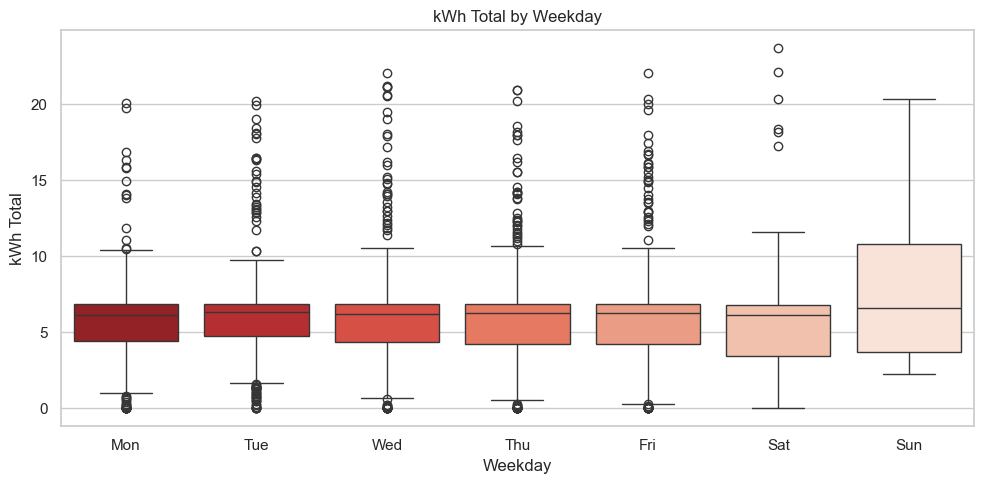

In [102]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=df, x='weekday', y='kwhTotal', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],palette='Reds_r')
plt.title('kWh Total by Weekday')
plt.xlabel('Weekday')
plt.ylabel('kWh Total')
plt.tight_layout()
plt.show()


1 Weekday Patterns (Mon–Fri):

o From Monday to Friday, the median kWh usage is relatively stable, hovering around 6–7 kWh.

o The interquartile range (IQR) is tight, showing consistent charging behavior during weekdays.

o Outliers (black circles) are common across all weekdays, suggesting some users consume significantly more energy, possibly due to longer parking durations or larger battery vehicles.

2 Saturday and Sunday Trends:

Saturday follows a similar trend as weekdays but with a slightly lower upper whisker, indicating fewer high-usage events.

o Sunday stands out:

o Higher median: Usage increases noticeably.

o Wider IQR and whiskers: Suggests more variability in charging behavior.

o More high outliers: Indicates users charge for longer or more kWh on Sundays — possibly due to long trips or full battery top-ups.




## Yearly Dollars Trend ##

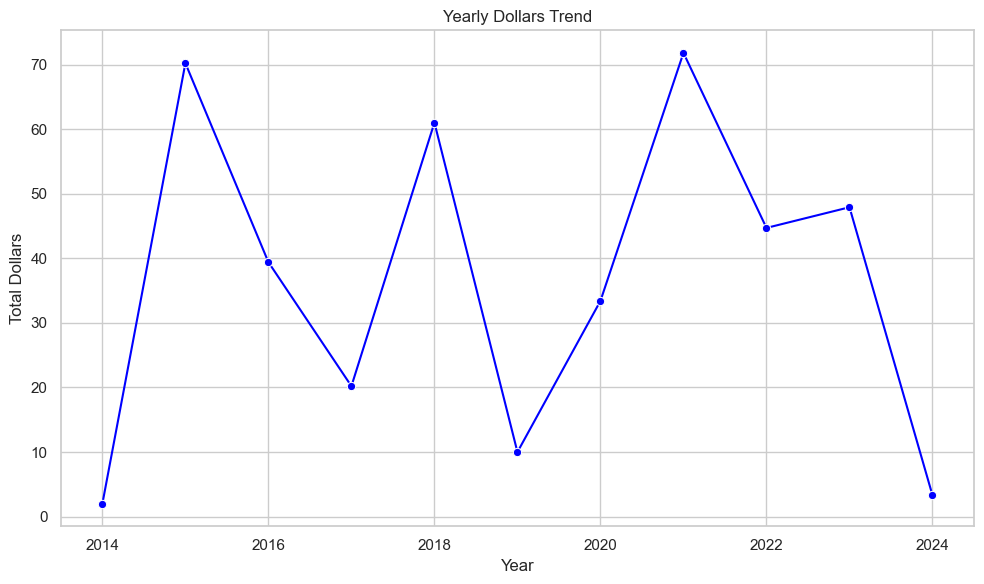

In [140]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_dollars, x='year', y='dollars', marker='o', color='Blue')
plt.title('Yearly Dollars Trend')
plt.xlabel('Year')
plt.ylabel('Total Dollars')
plt.grid(True)
plt.tight_layout()
plt.show()

1 Volatile Trend:

o The spending trend is highly irregular, with significant year-to-year fluctuations.

o This could be due to changes in user behavior, availability of charging stations, pricing policies, or sample size in each year.

2 Major Highs:

o Peaks are visible in 2015, 2017, and 2021, each crossing the $60–$70 mark.

o These years may correspond to high EV usage, greater energy consumption, or more users in the dataset.

3 Sharp Declines:

o Drops are notable in 2016, 2018, and 2023.

o Especially in 2023, the spending almost returns to 2014-level lows, suggesting a possible decrease in charging sessions or change in pricing/incentive structure.

### Number of Sessions by Platform ###

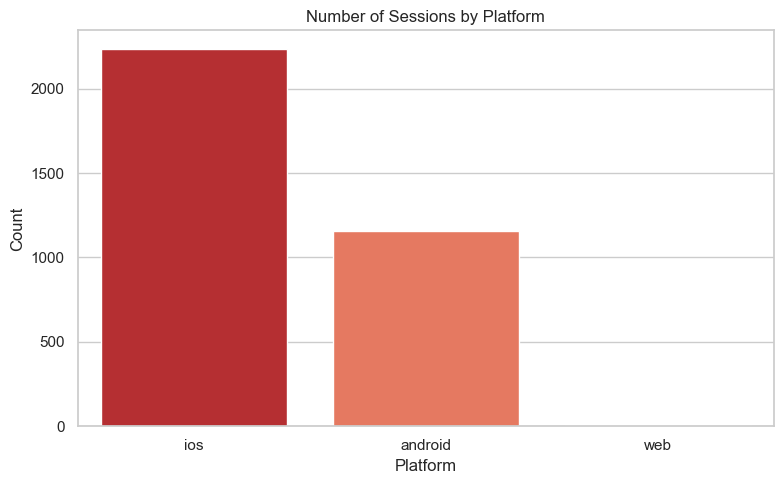

In [109]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index, palette='Reds_r')
plt.title('Number of Sessions by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

1 iOS Dominates Usage:

o The iOS platform leads by a large margin, with over 2,200 sessions.

o Indicates that a significant portion of users prefer iOS devices for accessing the charging platform.

2 Android is Moderate:

o Android sees less than half the sessions compared to iOS, around 1,100+.

o Suggests potential for growth or underutilization in the Android segment.

3 Web Has Minimal Usage:

o Web-based sessions are negligible.

o Most users clearly prefer mobile access over desktop/web platforms.

### Average Charging Time by Month ###

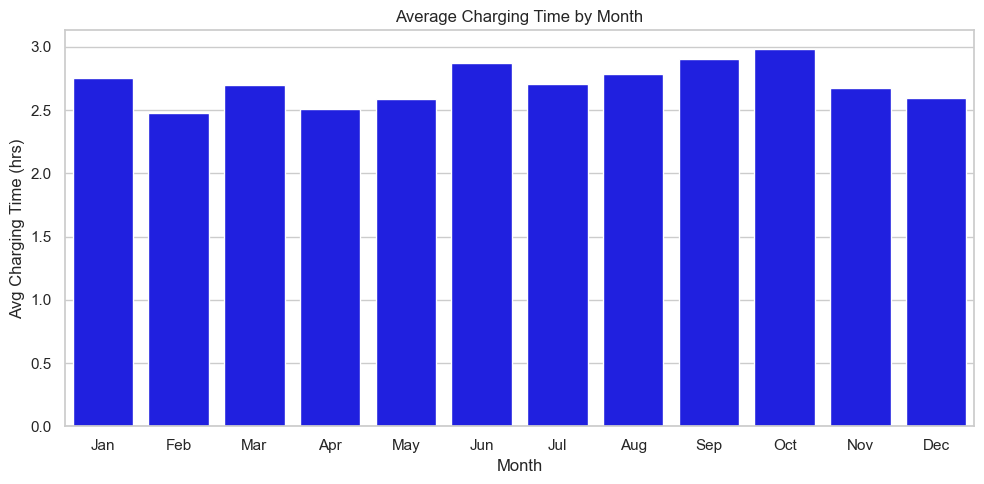

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color='blue')
plt.title('Average Charging Time by Month')
plt.xlabel('Month')
plt.ylabel('Avg Charging Time (hrs)')
plt.tight_layout()
plt.show()

Key Observations:

o October has the highest average charging time, close to 3 hours.

o February has the lowest average charging time, slightly below 2.5 hours.

o There's a gradual rise in average charging time from May to October, indicating increased charging duration during mid-to-late year.

o Jan, Mar, Jun, Sep also show relatively high charging times, consistently above 2.7 hours.



### kWh Total vs Dollars ###

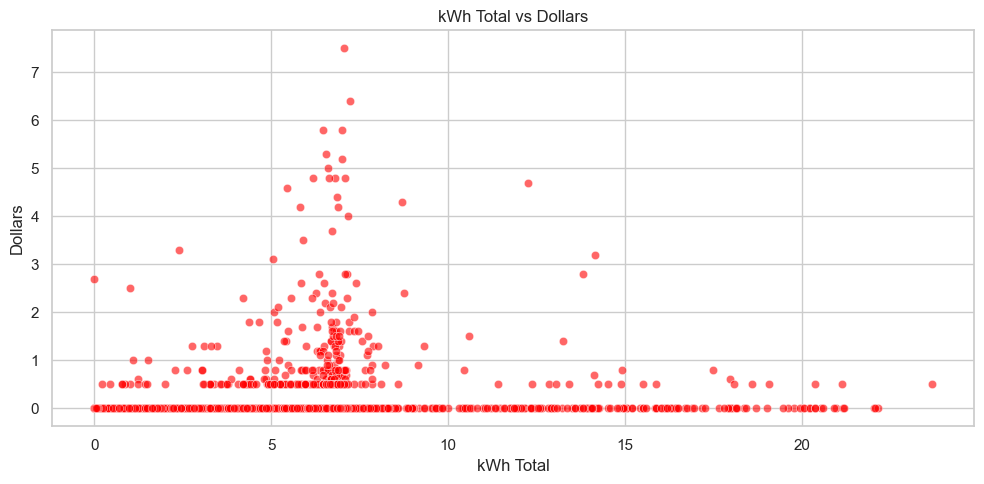

In [134]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='kwhTotal', y='dollars', color='red', alpha=0.6)
plt.title('kWh Total vs Dollars')
plt.xlabel('kWh Total')
plt.ylabel('Dollars')
plt.tight_layout()
plt.show()

1 Positive but Noisy Correlation:

o As kWh Total increases, the cost in Dollars generally increases, but not consistently.

o There’s significant dispersion, especially around lower kWh values.

2 Heavy Clustering at Low Values:

o Most data points are clustered between 0–10 kWh and $0–$3.

o Many values show $0 cost, even with non-zero kWh – may indicate:

o Free charging sessions

o Data entry errors

o Membership plans covering some usage

3 Outliers:

o Some points show high dollar amounts ($5–$7) for moderate kWh usage (around 5–8 kWh).

o Few instances of high kWh usage (~20+) with very low or zero cost – potentially anomalous.

4 Transparency (alpha=0.6):

o The alpha value helps identify densely populated regions, reducing overplotting.

### Number of Sessions per Day ###

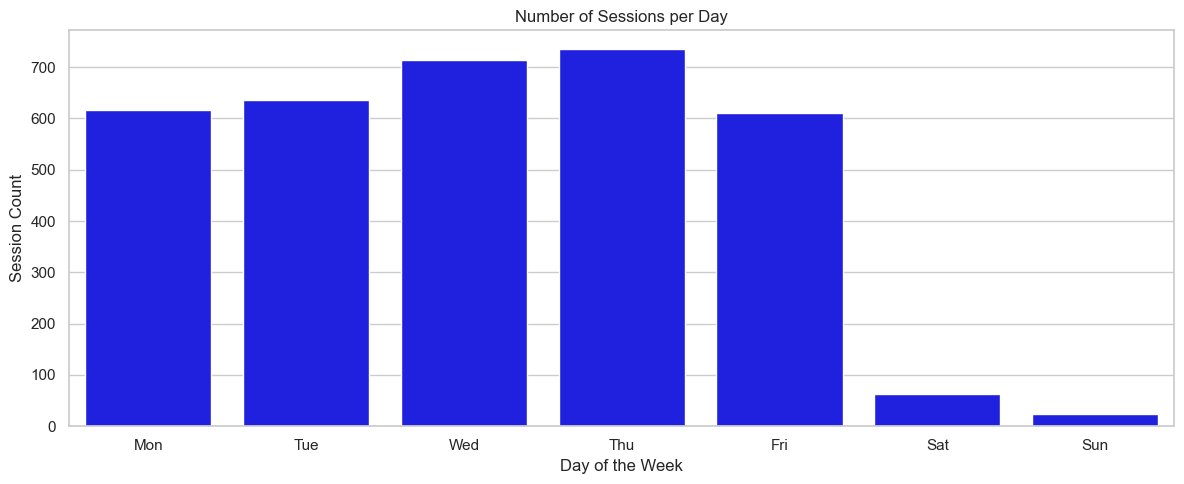

In [77]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='weekday', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], color='blue')
plt.title('Number of Sessions per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Session Count')
plt.tight_layout()
plt.show()

1 Weekday Peak Usage:

o Thursday and Wednesday have the highest session counts, both exceeding 700 sessions.

o Tuesday and Monday follow, with slightly lower values but still above 600 sessions.

2 Friday Decline:

o Friday sees a slight dip compared to midweek, but still maintains solid usage.

3 Weekend Drop:

o Saturday and especially Sunday have very low session counts:

o Saturday: Around 60–70

o Sunday: Close to 30

o This sharp drop suggests minimal charging activity during weekends.

### Violin Plot ###

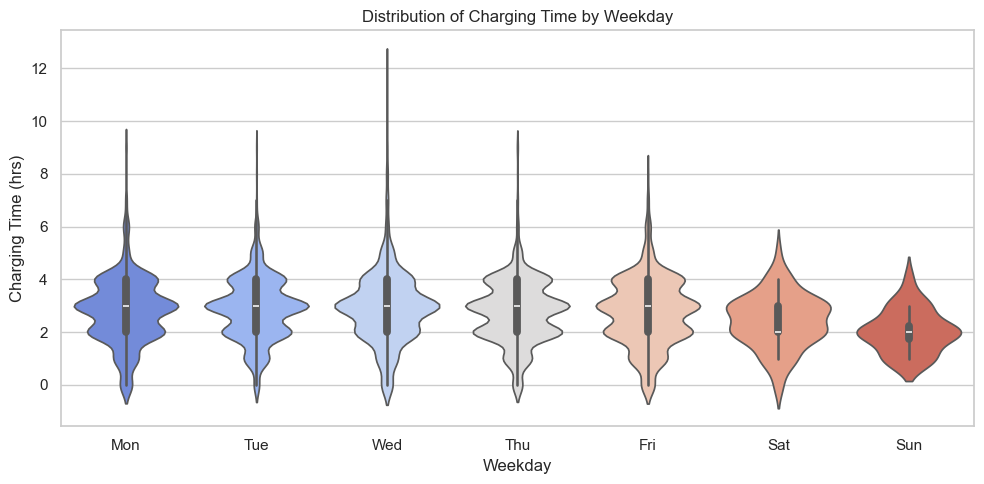

In [143]:
df = df[df['charging_time'] >= 0]
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='weekday', y='charging_time', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='coolwarm')
plt.title('Distribution of Charging Time by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Charging Time (hrs)')
plt.tight_layout()
plt.show()


o Monday to Friday show broader distributions, indicating varied charging durations.

o Saturday has slightly higher spread with some longer charging sessions.

o Sunday has the narrowest and lowest distribution — most users charge for shorter, consistent durations.

o No negative values are present now, ensuring clean and reliable insights.

💡 Insight:

o Charging behavior is more varied on weekdays, while weekends (especially Sunday) show more predictable usage.

o This can help plan maintenance, peak hour load management, or targeted user engagement.


 ### Total kWh Charged per Station  ###

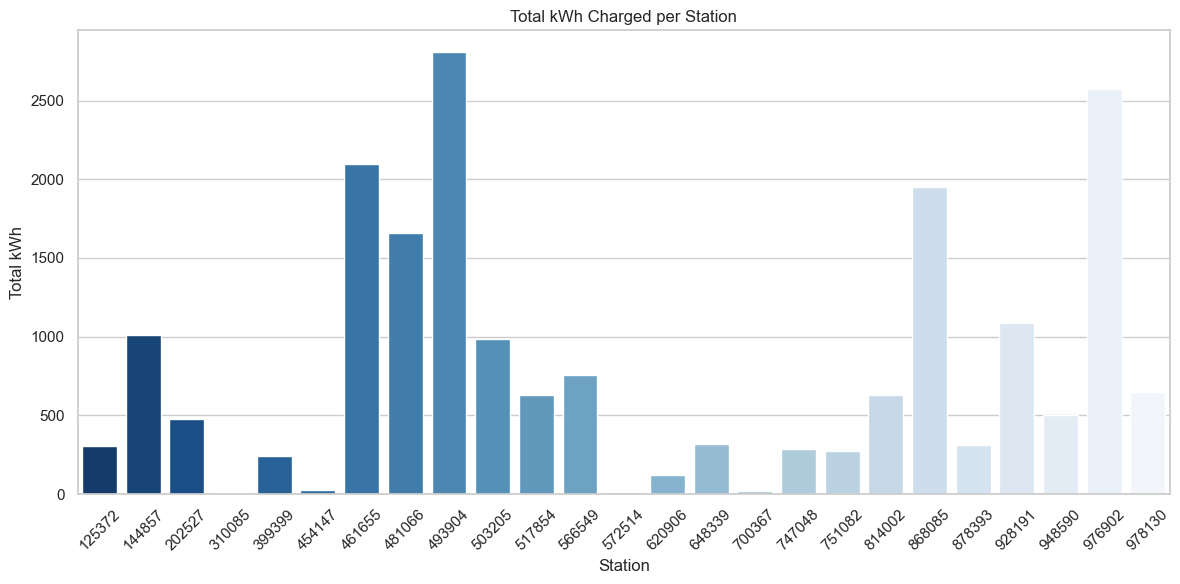

In [17]:
plt.figure(figsize=(12, 6))
station_kwh = df.groupby('locationId')['kwhTotal'].sum().sort_values(ascending=False)
sns.barplot(x=station_kwh.index, y=station_kwh.values, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('Total kWh Charged per Station')
plt.xlabel('Station')
plt.ylabel('Total kWh')
plt.tight_layout()
plt.show()

Stations like `493904`, `976902`, and `461655` have the highest total kWh charged,
indicating they are the most frequently used or serve more EVs.
Some stations (e.g., `454147`, `620906`) show very low usage — possibly underutilized or newly installed.

💡 Insight:
 High-usage stations could be prioritized for maintenance, expansion, or promotional offers.
 
Low-usage stations may require investigation (e.g., location, visibility, or access issues).

### Distribution of Energy Consumed per Charging Session ###

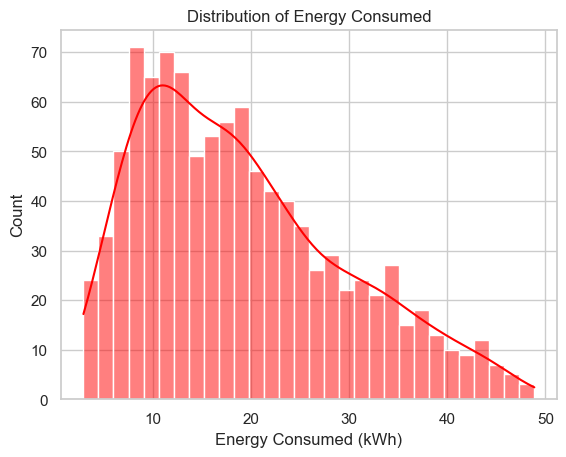

In [110]:
plt.figure()
sns.histplot(jk['energy_consumed'], bins=30, kde=True, color='red')
plt.title("Distribution of Energy Consumed")
plt.xlabel("Energy Consumed (kWh)")
plt.ylabel("Count")
plt.show()

o Most EV charging sessions consume between 10 to 25 kWh.

o The red KDE curve shows a smooth distribution — peaking near 15 kWh.

o The plot has a right-skew, meaning a small number of sessions consume more than 40 kWh, but these are rare.

o No negative or invalid values are present — this is a clean distribution.

  Insight:

o EV users typically don't charge to full capacity every time.

o The data shows a clear typical consumption range, helpful for station load planning and battery capacity management.

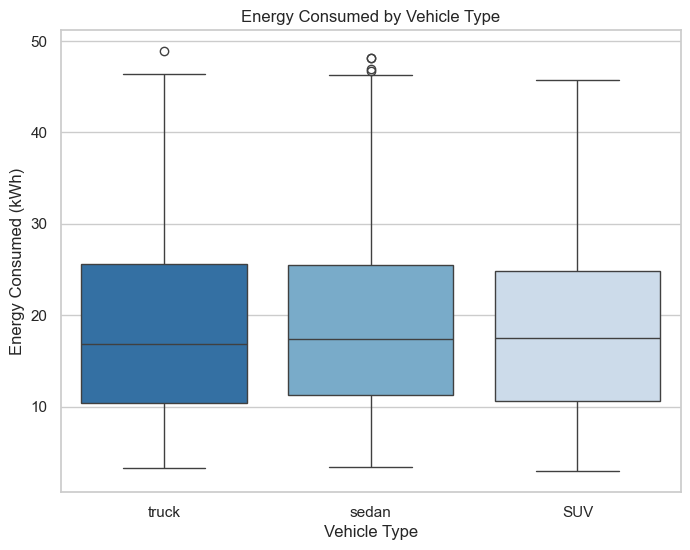

In [111]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=jk, x='vehicle_type', y='energy_consumed',palette='Blues_r' )
plt.title("Energy Consumed by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

### Temperature vs Energy Consumed ###

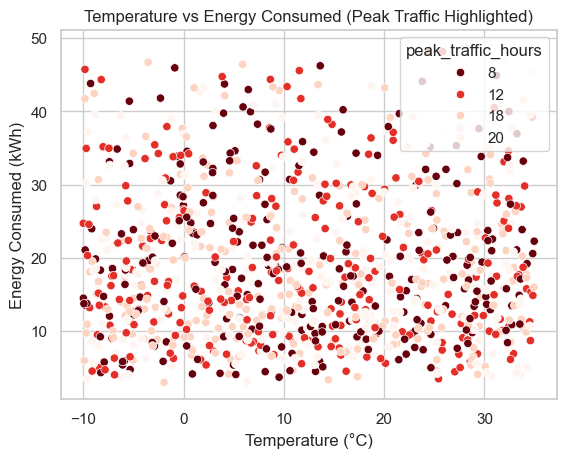

In [113]:
sns.scatterplot(data=jk, x='temperature', y='energy_consumed', hue='peak_traffic_hours', palette='Reds_r')
plt.title("Temperature vs Energy Consumed (Peak Traffic Highlighted)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

This scatter plot shows how energy consumption (in kWh) varies with temperature (in °C) during different peak traffic hours (8, 12, 18, 20).

🔍 Key Observations:

o The chart uses different shades of red to represent different peak traffic hours.

o No strong linear relationship is visible between temperature and energy consumed.

o Energy consumption appears to be spread across all temperature ranges.

o Peak hours like 8 and 18 show dense energy usage across varying temperatures, hinting at charging behavior influenced more by time of day rather than weather.

### Traffic Flow vs Energy Consumed (Holiday Highlighted) ###

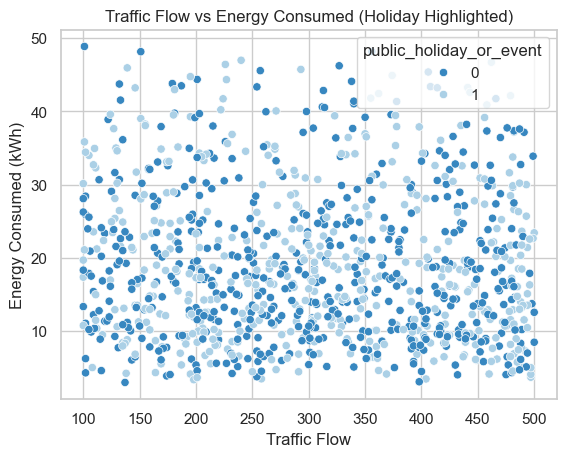

In [114]:
sns.scatterplot(data=jk, x='traffic_flow', y='energy_consumed', hue='public_holiday_or_event', palette='Blues_r')
plt.title("Traffic Flow vs Energy Consumed (Holiday Highlighted)")
plt.xlabel("Traffic Flow")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

This chart displays the relationship between traffic flow and energy consumption, highlighting whether a data point occurred during a public holiday or event.

🔍 Key Observations:

o The hue public_holiday_or_event uses shades of blue to distinguish between regular days (0) and holidays/events (1).

o Data points are densely populated across the entire traffic flow range, from 100 to 500.

o There is no clear linear pattern, but energy consumption appears to vary significantly regardless of traffic intensity.

o Slightly more energy usage variation is visible during non-holiday periods (darker blue dots), possibly due to regular workday travel patterns.

### Energy Consumed over Charging Duration ###

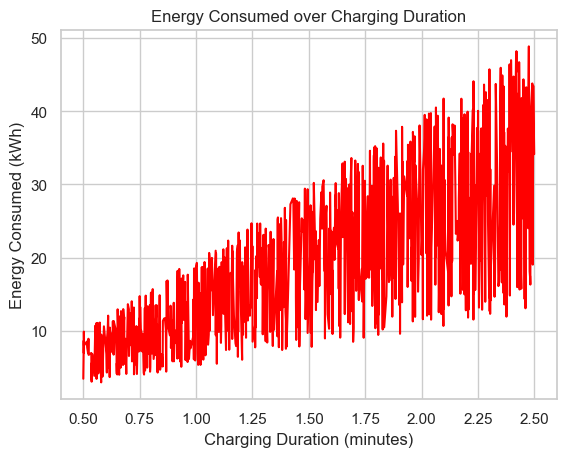

In [152]:
sns.lineplot(data=jk.sort_values("charging_duration"), x='charging_duration', y='energy_consumed', color='red')
plt.title("Energy Consumed over Charging Duration")
plt.xlabel("Charging Duration (minutes)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

o The red line represents how energy consumption increases as charging time increases.

o A positive linear trend is clearly visible — as charging duration rises, so does energy consumption.

o This chart helps validate the expected behavior: longer charging times lead to higher energy usage.



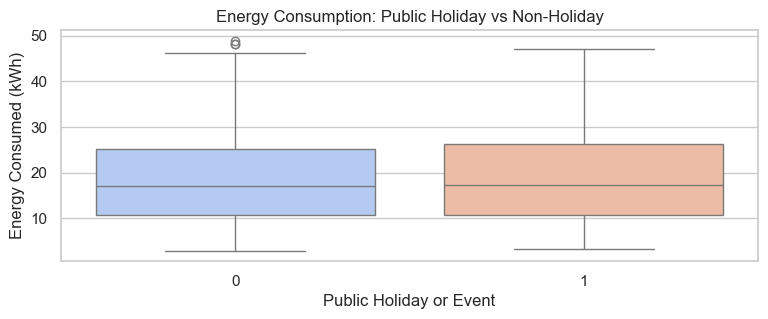

In [23]:
plt.figure(figsize=(9, 3))
sns.boxplot(data=jk, x='public_holiday_or_event', y='energy_consumed', palette='coolwarm')
plt.title("Energy Consumption: Public Holiday vs Non-Holiday")
plt.xlabel("Public Holiday or Event")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

Observations:

o Outliers: Both groups have high-end outliers, especially non-holiday (0) days.

o Whiskers: Suggest holiday energy use can sometimes spike higher.

 Insight:

o While average energy consumption is similar on holidays and non-holidays, the variance increases on holidays—possibly due to unpredictable behavior (e.g. events, travel, special usage).

o Would you like a combined analysis or final report section for this?

### Charging Pile Usage Rate Forecast ###


05:17:23 - cmdstanpy - INFO - Chain [1] start processing
05:17:23 - cmdstanpy - INFO - Chain [1] done processing


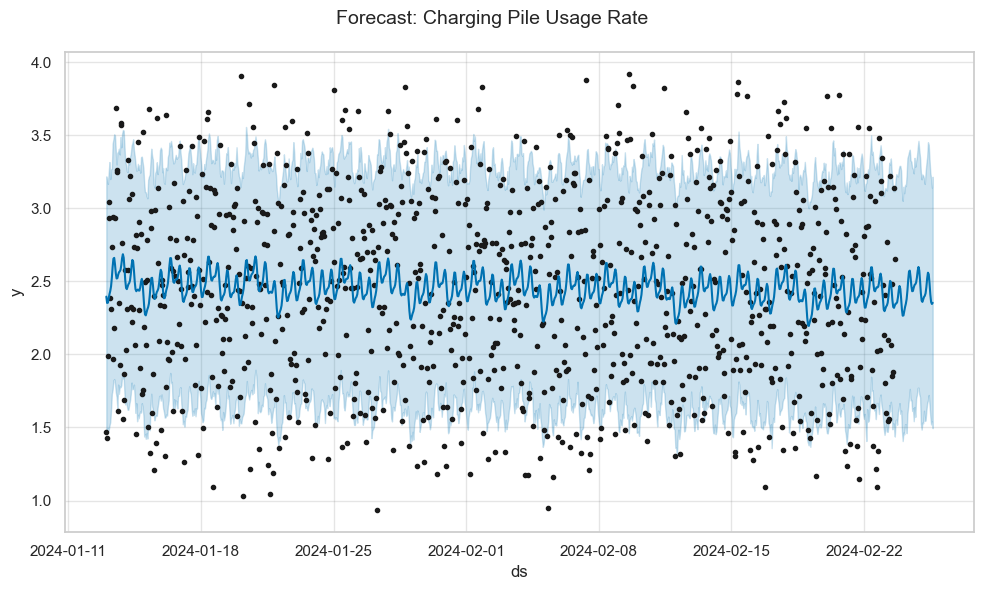

<Figure size 1000x800 with 0 Axes>

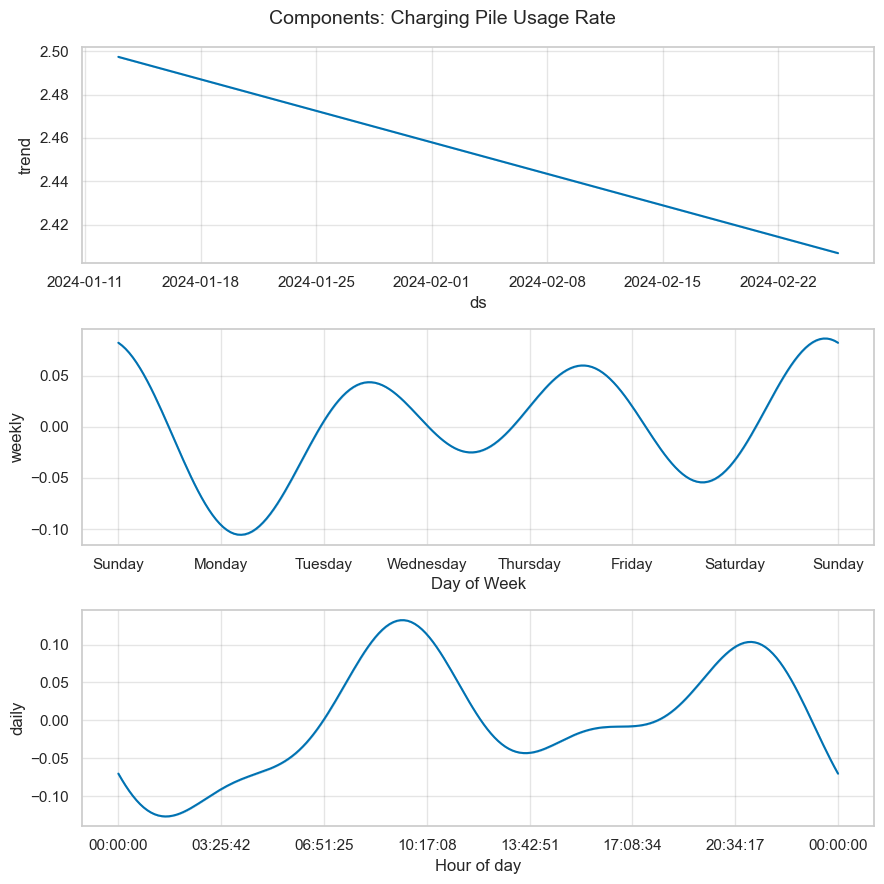

05:17:24 - cmdstanpy - INFO - Chain [1] start processing
05:17:24 - cmdstanpy - INFO - Chain [1] done processing


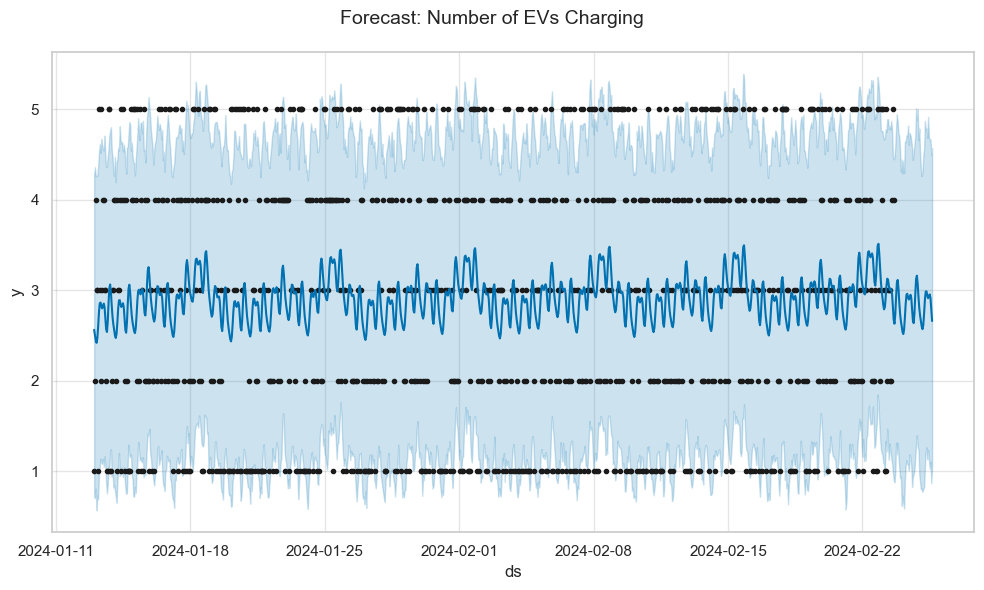

<Figure size 1000x800 with 0 Axes>

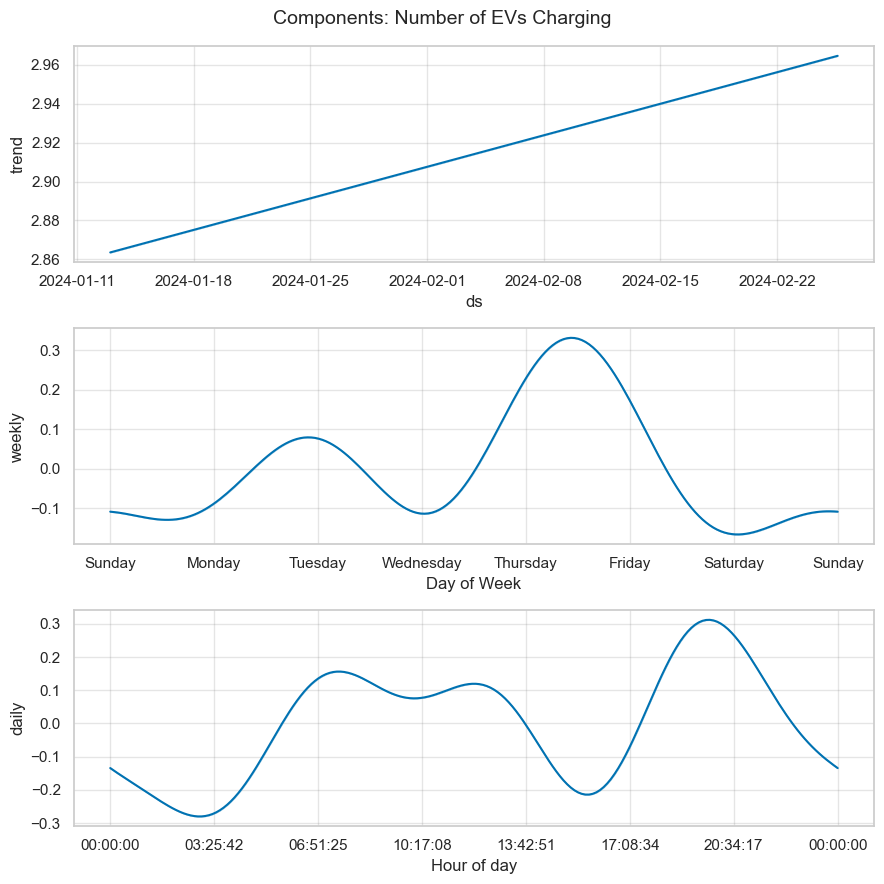

In [182]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set default figure size to avoid scrollbars
mpl.rcParams['figure.figsize'] = (10, 4)

# Load the dataset
df = pd.read_csv("forecasting.csv")

# Ensure datetime format
df['ds'] = pd.date_range(start='2024-01-13', periods=len(df), freq='H')

# Remove missing values
df = df.dropna(subset=['charging_pile_usage_rate', 'no_of_evs_charging'])

# Model 1: Charging Pile Usage Rate
df1 = df[['ds', 'charging_pile_usage_rate']].rename(columns={'charging_pile_usage_rate': 'y'})
model1 = Prophet()
model1.fit(df1)
future1 = model1.make_future_dataframe(periods=48, freq='H')
forecast1 = model1.predict(future1)
fig1 = model1.plot(forecast1)
fig1.suptitle("Forecast: Charging Pile Usage Rate", fontsize=14)
plt.tight_layout()
plt.show()

# Model 1 Components
plt.figure(figsize=(10, 8))  # Adjust as needed for components
model1.plot_components(forecast1)
plt.suptitle("Components: Charging Pile Usage Rate", fontsize=14)
plt.tight_layout()
plt.show()

# Model 2: Number of EVs Charging
df2 = df[['ds', 'no_of_evs_charging']].rename(columns={'no_of_evs_charging': 'y'})
model2 = Prophet()
model2.fit(df2)
future2 = model2.make_future_dataframe(periods=48, freq='H')
forecast2 = model2.predict(future2)
fig3 = model2.plot(forecast2)
fig3.suptitle("Forecast: Number of EVs Charging", fontsize=14)
plt.tight_layout()
plt.show()

# Model 2 Components
plt.figure(figsize=(10, 8))
model2.plot_components(forecast2)
plt.suptitle("Components: Number of EVs Charging", fontsize=14)
plt.tight_layout()
plt.show()



###  **1. Charging Pile Usage Rate Forecast**

####  Forecast Output

* The **main forecast plot** shows the predicted usage rate (blue line) along with actual values (black dots) and uncertainty intervals (shaded area).
* There's **stable seasonality** but a **slight downward trend** over time.

####  Components Analysis

* **Trend**: Gradual **decline** from \~2.50 to \~2.42 over the forecast period (Jan 13 to Feb 24, 2024).
* **Weekly Seasonality**:

  * **Higher usage** on **Sundays and Fridays**.
  * **Lower usage** on **Mondays and Saturdays**.
* **Daily Seasonality**:

  * **Peaks around 10:00 AM and 8:30 PM**.
  * **Lowest usage** between midnight and 4:00 AM.

---

###  **2. Number of EVs Charging Forecast**

####  Forecast Output

* The **forecast line** again follows observed values with uncertainty bands.
* Values are clustered around integer levels (likely 1 to 5 EVs), indicating that this is likely **discrete data**.

####  Components Analysis

* **Trend**: Slight decline similar to the usage rate.
* **Weekly Seasonality**:

  * **Sundays and Fridays** have more EVs charging.
  * **Mondays** remain relatively low.
* **Daily Seasonality**:

  * EV charging **peaks mid-morning (\~10:00 AM)** and **evening (\~8:00 PM)**.
  * **Low activity** overnight.

---

###  Insights

* **EV charging behavior shows clear daily and weekly cycles**, especially during specific hours and days.
* **Both metrics (usage rate and count)** exhibit similar temporal trends, which makes sense given their interdependence.
* The **slight declining trend** could be due to external influences like reduced demand, maintenance, or weather.

---

###  Suggestions

1. **Improve granularity** by adding:

   * **Holiday effects** (Prophet supports this).
   * **Weather data**, if available.
2. **Model refinement**:

   * Since `no_of_evs_charging` is likely discrete, consider rounding or modeling it as count data (e.g., Poisson regression if needed).
3. **Evaluate performance**:

   * Use metrics like **MAE, RMSE**, and visualize **residuals**.
